# Ejercicio 1

## Xabier Zuriarrain Beguiristain

Se guardan los archivos que se proporcionan en el ejercicio en la misma ruta donde se encuentra este script de Jupyter Notebook.

En primer lugar, abriremos el archivo de sentimientos, el cual es un texto sin formato. Al verlo en un editor de texto, podemos observar que las palabras y su sentimiento de valor están separadas por tabulador:

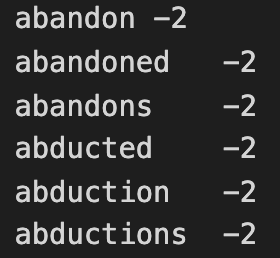

In [1]:
opened_sentimientos = open('Sentimientos.txt') #Abrimos el archivo .txt
valor_sentimiento = {} #Inicializamos un diccionario vacío
for linea in opened_sentimientos: #Recorremos el texto fila por fila
    lista_linea = linea.split('\t') #Creamos una lista por cada fila
    if lista_linea[0] not in valor_sentimiento:
        valor_sentimiento[lista_linea[0]] = int(lista_linea[1]) #Creamos una entrada en el diccionario con su key y value

Una vez introducido todo el archivo *Sentimientos.txt* en un diccionario, toca parsear el archivo *Tweets.txt*

Como sabemos de que cada línea es una cadena JSON:

In [2]:
import json #Importamos la librería JSON

opened_tweets = open('Tweets.txt') #Abrimos el archivo "Tweets.txt"
cont = 0 #Inicializamos el contador que utilizaremos como el key del diccionario
tweets = {} #Inicializamos el diccionario vacío
for line in opened_tweets: #Recorremos línea a línea el archivo
    cont += 1 #Contamos las líneas
    tweets[cont]=json.loads(line) # Introducimos cada cadena de JSON en el diccionario

Por lo tanto, tenemos los datos guardados en los siguientes diccionarios:
- valor_sentimiento. Diccionario que lo "key" son las palabras y value el valor de sentimiento de ellas
- tweets. El "key" es un número identificativo que se le ha puesto al número de fila que correspondía en el texto. En value está toda la información de cada tweet.

In [22]:
lista = [] #Inicializaremos la lista vacía que utilizaremos para rellenar lo impreso en pantalla
for key in tweets: #Recorremos el diccionario tweets
    valor = 0 #Inicializamos la variable valor a 0
    if 'text' in tweets[key]: #Descartamos los tweets que no tienen texto
        texto = tweets[key]['text'] #Introducimos en la variable texto el contenido de texto del tweet
        lista_texto = texto.replace(";",'').replace(',','').replace(':','').lower().split() #Limpiamos un poco los tweets, para que las palabras no contengan ni comas ni dos puntos ni punto ni punto y coma. Además poenmos todo en minúscula y dividimos el texto mediante espacios
        for palabra in lista_texto: #Recorremos el texto palabra por palabra
            if palabra in valor_sentimiento: #Si la palabra está en el diccionario donde están los valores sentimentales de las palabras
                valor += valor_sentimiento[palabra] #Sumamos a la variable valor el sentimiento asociado a la palabra
        tweets[key]['sentimiento'] = valor #Tras sumar todas las palabras, creamos un apartado más en el diccionario que guarda el valor
        string = 'EL TWEET ' + tweets[key]['text'] + ' TIENE UN SENTIMIENTO ASOCIADO DE ' + str(valor) #Guardamos en la variable string lo que hay que imprimir por pantalla
        print(string) #Imprimimos por pantalla
        print('\n') #Introducimos un salto de línea para que sea más clara la salida
        lista.append(string) #Rellenamos con lo impreso la variable lista
        

EL TWEET @Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ONE LAST TIME: GO AWHALE TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET Metin Şentürk Twitterda @metinsenturk MUHTEŞEM ÜÇLÜ; SEN, BEN, MÜZİK TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GOING TO BE SO GOOD 😭 TIENE UN SENTIMIENTO ASOCIADO DE 6


EL TWEET que hdp maicon lo que le hizo a david luiz jajajajajajajajajajaj,igual se jodio la carrera TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！ TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET RT @Positivamos: tudo o que eu quero é um amor sincero. TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET RT @GossipRoomOff: Si Nathalie sait pertinemment que son couple ne va pas durer, alors pourquoi accepter la demande en mariage de Vivian ? … TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET RT @Dayannalozano_: Junior va perdiendo... http://t.co/5mOsR7boLx TIENE UN SENTIMIENTO ASOCIADO DE 0


EL TWEET RT @Positivamos: tudo o 

Observando el resultado se puede sacar la siguiente conclusión. Se dispone de una lista de palabras que tienen un valor sentimental, pero estas palabras solo están en inglés. Al ver los resultados, nos damos cuenta, de que muchos de los tweets no están en el idioma anglosajón. Haciendo que el resultado sentimental sea nulo, debido a que no hay concordancia de la palabra que se encuentra en el archivo *Sentimientos.txt*

Una cosa que se podría hacer, es estudiar aquellos tweets que tienen una valoración sentimental, por lo que se puede asumir, aunque probablemente con un error, de que son los tweets que están escritos en inglés.

In [29]:
english_tweets = [] #Inicializamos la lista
for key in tweets: #Recorremos el diccionario
    if 'text' in tweets[key]: #Si el tweet tiene texto
        if tweets[key]['sentimiento'] != 0: #Comprobamos si el valor que se ha calculado antes es diferente a 0
            english_tweets.append(tweets[key]['sentimiento']) #En caso positivo, guardamos el resultado en la lista 

In [30]:
freq_dict = {} #Inicializamos un diccionario vacío
for element in english_tweets: #Recorremos la lista que contiene todos los resultados no nulos
    if element in freq_dict: #Rellenamos el diccionario con frecuencias de cuántas veces aparece cada resultado
        freq_dict[element] += 1
    else:
        freq_dict[element] = 1

Tras calcular la tabla de frecuencias de cada resultado, se ploteará este resultado.

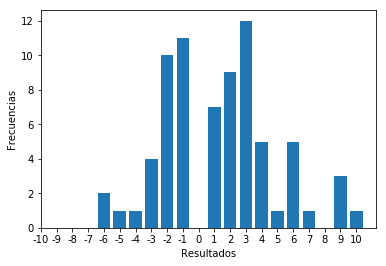

In [32]:
%matplotlib inline 
import matplotlib.pyplot as plt #Importamos la librería

plt.bar(freq_dict.keys(),freq_dict.values()) #Realizamos el bar plot
plt.xticks(range(-10,11,1),range(-10,11,1)) #Editamos los valores del eje x
plt.xlabel('Resultados') #Editamos el título del eje x
plt.ylabel('Frecuencias') #Editamos el título del eje y
plt.show() #Dibujamos el gráfico

Realizamos un cálcula estadístico simple.

In [34]:
import numpy as np #Importamos Numpy
media = np.mean(english_tweets) #Calculamos la media
print('Media:',media) #Imprimimos la media
var = np.var(english_tweets) #Calculamos la varianza
print('Varianza:',var) #Imprimimos la varianza

Media: 1.3150684931506849
Varianza: 12.352786639144306


Aquí se puede decir que la media de los tweets es positiva, por lo que hay más tweet de sentimiento positivo que de negativo. No obstante hay mucha dispersión, debido a que hay mucha varianza.

# Ejercicio 2

En el ejercicio anterior se ha visto que muchos de los tweets seguían teniendo un valor nulo. En este ejercicio  se han estimado los valores de las palabras con sentimiento nulo:

- Por un lado, en el caso de tweets sin valor sentimental, se ha impuesto el valor de la media total que se ha calculado antes.
- En cuanto a los tweets que tienen un valor sentimental, se ha calculado la media que corresponde a cada palabra respecto al valor total que se tiene del tweet.

In [35]:
for key in tweets: #Recorremos el diccionario tweets
    if 'text' in tweets[key]: #Filtramos los tweets que tienen texto
        if tweets[key]['sentimiento'] == 0: #Si el valor sentimental es nulo
            media_sentimiento_palabra = (round(media,2)) #Cogemos la media obtenida en el ejercicio anterior
            lista_tweet = tweets[key]['text'].replace(';','').replace(',','').replace('.','').replace(':','').replace('\'','').lower().split() #Se dividen las palabras limpiando un poco
            cantidad_palabras = len(lista_tweet) #Se cuentan las palabras del tweet
            valor_del_tweet = 0 #Se inicializa el valor del tweet entero
            print('-----------------------------------------------') #Se imprime por pantalla en un formato amigable
            print('TWEET', tweets[key]['text'])
            print('-----------------------------------------------')
            for palabra in lista_tweet: #Se recorre la lista palabra por palabra
                if palabra not in valor_sentimiento: #Si la palabra no está en el fichero que tiene los valores sentimentales
                    print(palabra + ': ' + str(media_sentimiento_palabra)) #Imprimimos el valor de la palabra
                    valor_del_tweet += media_sentimiento_palabra #Sumamos el valor de la palabra al valor total del tweet
                else: #En caso contrario
                    print(palabra + ': está en la lista de palabras con sentimiento asociado y es: ' + str(valor_sentimiento[palabra])) #La palabra se encuentra en el fichero de valor de sentimientos
                    valor_del_tweet += valor_sentimiento[palabra] #Se suma al valor total
            tweets[key]['sentimiento'] = valor_del_tweet #Se guarda el valor total en el apartado del diccionario
            print('-----------------------------------------------')#Se imprime de forma amigable
            print('TOTAL: ' + str(tweets[key]['sentimiento']))
            print('-----------------------------------------------')
            print('\n')
            
        else: #En caso contrario
            lista_tweet =tweets[key]['text'].replace(';','').replace(',','').replace('.','').replace(':','').replace('\'','').lower().split() #Dividimos las palabras y limpiamos
            cantidad_palabras = len(lista_tweet) #Contamos la cantidad de palabras
            media_sentimiento_palabra = (round(tweets[key]['sentimiento']/cantidad_palabras,2)) #Realizamos una media del valor total
            valor_del_tweet = 0 #Inicializamos el valor del tweet
            print('-----------------------------------------------') #Imprimimos por pantalla de forma amigable
            print('TWEET', tweets[key]['text'])
            print('-----------------------------------------------')
            for palabra in lista_tweet: #Recorremos palabra por palabra
                if palabra in valor_sentimiento: #Si la palabra está en el archivo donde se registran los valores sentimentales
                    valor_del_tweet += valor_sentimiento[palabra] #Sumamos su valor al valor del tweet
                    print(palabra + ': está en la lista de palabras con sentimiento asociado y es: ' + str(valor_sentimiento[palabra])) #Imprimimos
                else: #En caso contrario
                    valor_del_tweet += media_sentimiento_palabra #El valor del tweet será la media que se ha obtenido antes
                    print(palabra + ': ' + str(media_sentimiento_palabra)) #Imprimimos por pantalla
            tweets[key]['sentimiento'] = valor_del_tweet #Guardamos en el diccionario
            print('-----------------------------------------------')
            print('TOTAL: ' + str(tweets[key]['sentimiento']))
            print('-----------------------------------------------')
            print('\n')

-----------------------------------------------
TWEET @Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ONE LAST TIME: GO AWHALE
-----------------------------------------------
@brenamae_: 1.32
i: 1.32
whale: 1.32
slap: 1.32
your: 1.32
fin: 1.32
and: 1.32
tell: 1.32
you: 1.32
one: 1.32
last: 1.32
time: 1.32
go: 1.32
awhale: 1.32
-----------------------------------------------
TOTAL: 18.48
-----------------------------------------------


-----------------------------------------------
TWEET Metin Şentürk Twitterda @metinsenturk MUHTEŞEM ÜÇLÜ; SEN, BEN, MÜZİK
-----------------------------------------------
metin: 1.32
şentürk: 1.32
twitterda: 1.32
@metinsenturk: 1.32
muhteşem: 1.32
üçlü: 1.32
sen: 1.32
ben: 1.32
müzi̇k: 1.32
-----------------------------------------------
TOTAL: 11.88
-----------------------------------------------


-----------------------------------------------
TWEET RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GOING TO BE SO GOOD 😭
---------------------------------------

シラヌイだって38とかだからさぁ・・・: 1.32
-----------------------------------------------
TOTAL: 1.32
-----------------------------------------------


-----------------------------------------------
TWEET RT @cthagod: I keep making the mistake of talking to people who don't know what they are talking about.......
-----------------------------------------------
rt: -0.11
@cthagod: -0.11
i: -0.11
keep: -0.11
making: -0.11
the: -0.11
mistake: está en la lista de palabras con sentimiento asociado y es: -2
of: -0.11
talking: -0.11
to: -0.11
people: -0.11
who: -0.11
dont: -0.11
know: -0.11
what: -0.11
they: -0.11
are: -0.11
talking: -0.11
about: -0.11
-----------------------------------------------
TOTAL: -3.9799999999999986
-----------------------------------------------


-----------------------------------------------
TWEET อยากกินบอนชอน อยากกินไก่ทอด อยากกินซุปกิมจิ อยากกินเกี๊ยวซ่า อยากกินทุกอย่างอ่ะตอนนี้ หิววววว...!!! 😭😂
-----------------------------------------------
อยากกินบอนชอน: 1.32
อยากกินไก่ท

a: 1.32
little: 1.32
push?: 1.32
http//tco/fpioaady2s: 1.32
-----------------------------------------------
TOTAL: 13.200000000000001
-----------------------------------------------


-----------------------------------------------
TWEET RT @Arab_Panorama: بالسينما يقبض الممثل ملايين
 كذلك المخرج والممتج المستفيد الاكبر,
أما بفليم داعش
المخرج السيناريست والمنتج
خسروا
لان الم…
-----------------------------------------------
rt: 1.32
@arab_panorama: 1.32
بالسينما: 1.32
يقبض: 1.32
الممثل: 1.32
ملايين: 1.32
كذلك: 1.32
المخرج: 1.32
والممتج: 1.32
المستفيد: 1.32
الاكبر: 1.32
أما: 1.32
بفليم: 1.32
داعش: 1.32
المخرج: 1.32
السيناريست: 1.32
والمنتج: 1.32
خسروا: 1.32
لان: 1.32
الم…: 1.32
-----------------------------------------------
TOTAL: 26.400000000000002
-----------------------------------------------


-----------------------------------------------
TWEET @SoccerSeki824 まあ、そこら辺はまた（笑）
-----------------------------------------------
@soccerseki824: 1.32
まあ、そこら辺はまた（笑）: 1.32
-------------------

lost: está en la lista de palabras con sentimiento asociado y es: -3
my: -0.38
headphones: -0.38
my: -0.38
day: -0.38
is: -0.38
over: -0.38
😤😤: -0.38
-----------------------------------------------
TOTAL: -5.659999999999999
-----------------------------------------------


-----------------------------------------------
TWEET People at my school think being gay is a choice but if being gay really is a choice why do most gay people including me want to die? pt.1
-----------------------------------------------
people: 0.03
at: 0.03
my: 0.03
school: 0.03
think: 0.03
being: 0.03
gay: 0.03
is: 0.03
a: 0.03
choice: 0.03
but: 0.03
if: 0.03
being: 0.03
gay: 0.03
really: 0.03
is: 0.03
a: 0.03
choice: 0.03
why: 0.03
do: 0.03
most: 0.03
gay: 0.03
people: 0.03
including: 0.03
me: 0.03
want: está en la lista de palabras con sentimiento asociado y es: 1
to: 0.03
die?: 0.03
pt1: 0.03
-----------------------------------------------
TOTAL: 1.8400000000000005
--------------------------------------------

16: 1.32
de: 1.32
setembro: 1.32
não: 1.32
é: 1.32
preciso: 1.32
votar!: 1.32
por: 1.32
enquanto: 1.32
a: 1.32
votação: 1.32
é: 1.32
apenas: 1.32
para: 1.32
os: 1.32
que: 1.32
ainda: 1.32
não: 1.32
foram: 1.32
indicados: 1.32
-----------------------------------------------
TOTAL: 33.0
-----------------------------------------------


-----------------------------------------------
TWEET RT @BieberAnnual: Retweet if you want to gain just follow everyone who retweets this and follow back who ever follows you
-----------------------------------------------
rt: 0.14
@bieberannual: 0.14
retweet: 0.14
if: 0.14
you: 0.14
want: está en la lista de palabras con sentimiento asociado y es: 1
to: 0.14
gain: está en la lista de palabras con sentimiento asociado y es: 2
just: 0.14
follow: 0.14
everyone: 0.14
who: 0.14
retweets: 0.14
this: 0.14
and: 0.14
follow: 0.14
back: 0.14
who: 0.14
ever: 0.14
follows: 0.14
you: 0.14
-----------------------------------------------
TOTAL: 5.659999999999997
------

needs: 1.32
sincerity: está en la lista de palabras con sentimiento asociado y es: 2
-----------------------------------------------
TOTAL: 7.28
-----------------------------------------------


-----------------------------------------------
TWEET RT @gazoushu: なんだこのアプリｗ
登録したらビッチから連絡きて
連絡先交換してデートしてきたｗｗ

しかも可愛すぎるしエロいし
俺でもモテるとかｗｗ

マジで一回DLしてみてくれｗｗ

→http://t.co/LfHgdaeDlr http://t.co/5ax…
-----------------------------------------------
rt: 1.32
@gazoushu: 1.32
なんだこのアプリｗ: 1.32
登録したらビッチから連絡きて: 1.32
連絡先交換してデートしてきたｗｗ: 1.32
しかも可愛すぎるしエロいし: 1.32
俺でもモテるとかｗｗ: 1.32
マジで一回dlしてみてくれｗｗ: 1.32
→http//tco/lfhgdaedlr: 1.32
http//tco/5ax…: 1.32
-----------------------------------------------
TOTAL: 13.200000000000001
-----------------------------------------------


-----------------------------------------------
TWEET RT @30vs09: FA) 슈가군 브이！ㅎㅎ http://t.co/bXRDCriwOP
-----------------------------------------------
rt: 1.32
@30vs09: 1.32
fa): 1.32
슈가군: 1.32
브이！ㅎㅎ: 1.32
http//tco/bxrdcriwop: 1.32
------------

# Estudio extra

Algo complementario que se podría hacer, es aprender de esta salida. Es decir, se podría ir guardando los datos, y así actualizar una lista de palabras que tienen un sentimiento asociado. 

Imaginémonos que aparece una palabra 4 veces en todos los tweets y es comer:
- Tiene 8 palabras de longitud el tweet y el sentimiento asociado total es 16
- Tiene 4 palabras de longitud el tweet y el sentimiento asociado total es 20
- Tiene 6 palabras de longitud el tweet y el sentimiento asociado total es 6
- Tiene 10 palabras de longitud el tweet y el sentimiento asociado total es -1

Por lo tanto, se podría hacer una media de cada uno de los resultados que más se asemejen a la palabra: Haciendo algo parecido a:

In [11]:
print(str((16/8 + 20/4 + 6/6 + -1/10)/4))

1.975


Editaremos la celda correspondiente al ejercicio 2. Es por ello que no la comentaremos. No obstante. Lo nuevo será comentado.

In [36]:
new_dictionary = {} #Inicializamos el nuevo diccionario
for key in tweets: 
    if 'text' in tweets[key]: 
        if tweets[key]['sentimiento'] == 0:
            media_sentimiento_palabra = (round(media,2))
            lista_tweet = tweets[key]['text'].replace(';','').replace(',','').replace('.','').replace(':','').replace('\'','').lower().split()
            cantidad_palabras = len(lista_tweet)
            valor_del_tweet = 0
            print('-----------------------------------------------')
            print('TWEET', tweets[key]['text'])
            print('-----------------------------------------------')
            for palabra in lista_tweet:
                if palabra not in valor_sentimiento:
                    print(palabra + ': ' + str(media_sentimiento_palabra))
                    valor_del_tweet += media_sentimiento_palabra
                else:
                    print(palabra + ': está en la lista de palabras con sentimiento asociado y es: ' + str(valor_sentimiento[palabra]))
                    valor_del_tweet += valor_sentimiento[palabra]
            tweets[key]['sentimiento'] = valor_del_tweet
            print('-----------------------------------------------')
            print('TOTAL: ' + str(tweets[key]['sentimiento']))
            print('-----------------------------------------------')
            print('\n')
            
            
        else:
            lista_tweet =tweets[key]['text'].replace(';','').replace(',','').replace('.','').replace(':','').replace('\'','').lower().split()
            cantidad_palabras = len(lista_tweet)
            media_sentimiento_palabra = (round(tweets[key]['sentimiento']/cantidad_palabras,2))
            valor_del_tweet = 0
            print('-----------------------------------------------')
            print('TWEET', tweets[key]['text'])
            print('-----------------------------------------------')
            for palabra in lista_tweet:
                if palabra in valor_sentimiento:
                    valor_del_tweet += valor_sentimiento[palabra]
                    print(palabra + ': está en la lista de palabras con sentimiento asociado y es: ' + str(valor_sentimiento[palabra]))
                else:
                    valor_del_tweet += media_sentimiento_palabra
                    print(palabra + ': ' + str(media_sentimiento_palabra))
            tweets[key]['sentimiento'] = valor_del_tweet
            print('-----------------------------------------------')
            print('TOTAL: ' + str(tweets[key]['sentimiento']))
            print('-----------------------------------------------')
            print('\n')
        for palabra in lista_tweet: #Recorremos la lista de palabras del tweet
            if palabra not in valor_sentimiento: #Si la palabra no se encuentra en el texto del valor de sentimiento entramos
                if palabra not in new_dictionary: #Si la palabra aún no se encuentra en el nuevo diccionario
                    new_dictionary[palabra] = [valor_del_tweet/cantidad_palabras] #Introducimos como key y añadimos la media del tweet en una lista
                elif palabra in new_dictionary: #En caso de que la palabra ya exista en el nuevo diccionario
                    new_dictionary[palabra].append(valor_del_tweet/cantidad_palabras) #Añadimos la media del tweet a la lista

for key in new_dictionary: #Recorremos el nuevo diccionario
    new_dictionary[key] = round(np.sum(new_dictionary[key])/len(new_dictionary[key]),2) #Realizamos la media de los valores de las listas de cada key

-----------------------------------------------
TWEET @Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ONE LAST TIME: GO AWHALE
-----------------------------------------------
@brenamae_: 1.32
i: 1.32
whale: 1.32
slap: 1.32
your: 1.32
fin: 1.32
and: 1.32
tell: 1.32
you: 1.32
one: 1.32
last: 1.32
time: 1.32
go: 1.32
awhale: 1.32
-----------------------------------------------
TOTAL: 18.48
-----------------------------------------------


-----------------------------------------------
TWEET Metin Şentürk Twitterda @metinsenturk MUHTEŞEM ÜÇLÜ; SEN, BEN, MÜZİK
-----------------------------------------------
metin: 1.32
şentürk: 1.32
twitterda: 1.32
@metinsenturk: 1.32
muhteşem: 1.32
üçlü: 1.32
sen: 1.32
ben: 1.32
müzi̇k: 1.32
-----------------------------------------------
TOTAL: 11.88
-----------------------------------------------


-----------------------------------------------
TWEET RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GOING TO BE SO GOOD 😭
---------------------------------------

http//tco/3aljeckx40: 1.32
-----------------------------------------------
TOTAL: 23.76
-----------------------------------------------


-----------------------------------------------
TWEET @yuxki @zibakurei_bot っしょァァ！
-----------------------------------------------
@yuxki: 1.32
@zibakurei_bot: 1.32
っしょァァ！: 1.32
-----------------------------------------------
TOTAL: 3.96
-----------------------------------------------


-----------------------------------------------
TWEET @chi_tanmama 浜松なうだよwww

雷えぐい！！

ありがとー^ ^
-----------------------------------------------
@chi_tanmama: 1.32
浜松なうだよwww: 1.32
雷えぐい！！: 1.32
ありがとー^: 1.32
^: 1.32
-----------------------------------------------
TOTAL: 6.6000000000000005
-----------------------------------------------


-----------------------------------------------
TWEET Van Morrison - Gloria &lt;3
-----------------------------------------------
van: 1.32
morrison: 1.32
-: 1.32
gloria: 1.32
&lt3: 1.32
-----------------------------------------------
TOT

-----------------------------------------------
@ru_ru50: -1.19
ill: está en la lista de palabras con sentimiento asociado y es: -2
beat: -1.19
that: -1.19
ass: está en la lista de palabras con sentimiento asociado y es: -4
19: -1.19
times: -1.19
tonight: -1.19
😉😏😘: -1.19
-----------------------------------------------
TOTAL: -14.329999999999998
-----------------------------------------------


-----------------------------------------------
TWEET RT @sandratorensma: http://t.co/Np9Z6LN95y
-----------------------------------------------
rt: 1.32
@sandratorensma: 1.32
http//tco/np9z6ln95y: 1.32
-----------------------------------------------
TOTAL: 3.96
-----------------------------------------------


-----------------------------------------------
TWEET RT @maamsalcatraz: Cette gomme la plus grosse arnaque du siècle elle était sensé gommé ls stylo ,mais elle déchirer la feuille cet pute htt…
-----------------------------------------------
rt: 1.32
@maamsalcatraz: 1.32
cette: 1.32
gomm

TOTAL: 10.56
-----------------------------------------------


-----------------------------------------------
TWEET No olvide nada, solo deje de lado lo que ya no tenía arreglo👌
-----------------------------------------------
no: está en la lista de palabras con sentimiento asociado y es: -1
olvide: -0.28
nada: -0.28
solo: -0.28
deje: -0.28
de: -0.28
lado: -0.28
lo: -0.28
que: -0.28
ya: -0.28
no: está en la lista de palabras con sentimiento asociado y es: -1
tenía: -0.28
arreglo👌: -0.28
-----------------------------------------------
TOTAL: -5.080000000000002
-----------------------------------------------


-----------------------------------------------
TWEET اللهم اغفر لي ذنبي ، ووسع لي في داري وبارك لي فيما رزقتني http://t.co/lsMaesqoLz
-----------------------------------------------
اللهم: 1.32
اغفر: 1.32
لي: 1.32
ذنبي: 1.32
،: 1.32
ووسع: 1.32
لي: 1.32
في: 1.32
داري: 1.32
وبارك: 1.32
لي: 1.32
فيما: 1.32
رزقتني: 1.32
http//tco/lsmaesqolz: 1.32
-------------------------------------

has: -0.21
certainly: -0.21
caused: -0.21
the: -0.21
most: -0.21
problems: está en la lista de palabras con sentimiento asociado y es: -2
for: -0.21
the: -0.21
club: -0.21
#sonsofanarchy: -0.21
-----------------------------------------------
TOTAL: -5.57
-----------------------------------------------


-----------------------------------------------
TWEET Food &amp; Ryhmes for thought for the common tweeps @HitsNotHomework @MissMandii
-----------------------------------------------
food: 1.32
&amp: 1.32
ryhmes: 1.32
for: 1.32
thought: 1.32
for: 1.32
the: 1.32
common: 1.32
tweeps: 1.32
@hitsnothomework: 1.32
@missmandii: 1.32
-----------------------------------------------
TOTAL: 14.520000000000001
-----------------------------------------------


-----------------------------------------------
TWEET RT @ChochoMartinez1: Cami mientras me cagaba a pedo ,  la abrazaba y no la dejaba ir jajajajaja n.n
-----------------------------------------------
rt: -0.12
@chochomartinez1: -0.12
cami: 

TWEET RT @AL_shiratori: 【中毒性注意】納豆にちょい足しすると捗る禁断の廃人飯レシピまとめ
http://t.co/AvYdduelou
今年見た情報の中で一番ヤバいヤツだった
-----------------------------------------------
rt: 1.32
@al_shiratori: 1.32
【中毒性注意】納豆にちょい足しすると捗る禁断の廃人飯レシピまとめ: 1.32
http//tco/avydduelou: 1.32
今年見た情報の中で一番ヤバいヤツだった: 1.32
-----------------------------------------------
TOTAL: 6.6000000000000005
-----------------------------------------------


-----------------------------------------------
TWEET RT @shinparu0330: ぱるる姫ウイルス拡散　#ぱるる  #Paruru https://t.co/k28xr2MdHg
-----------------------------------------------
rt: 1.32
@shinparu0330: 1.32
ぱるる姫ウイルス拡散: 1.32
#ぱるる: 1.32
#paruru: 1.32
https//tco/k28xr2mdhg: 1.32
-----------------------------------------------
TOTAL: 7.920000000000001
-----------------------------------------------


-----------------------------------------------
TWEET FFC IP's Symbaloo - Ozbirn's Google Mix #FCSLearn #FFCSoar #alpartners @FFCSoar http://t.co/Ub2wkOWat8
-----------------------------------------------
ffc: 1.32
i

In [18]:
for key in new_dictionary: #Recorremos el diccionario e imprimimos sus valores
    print(key + ':',new_dictionary[key])   

@brenamae_: 1.32
i: 0.8
whale: 1.32
slap: 1.32
your: 0.55
fin: 1.32
and: 0.82
tell: 1.32
you: 0.83
one: 1.09
last: 0.59
time: 0.66
go: 0.95
awhale: 1.32
metin: 1.32
şentürk: 1.32
twitterda: 1.32
@metinsenturk: 1.32
muhteşem: 1.32
üçlü: 1.32
sen: 1.32
ben: 1.32
müzi̇k: 1.32
rt: 1.13
@byunghns: 1.25
😭: 1.28
#틴탑: 1.25
so: 0.92
much: 1.2
#쉽지않아: 1.25
is: 0.4
going: 1.3
to: 0.81
be: 0.89
que: 1.12
hdp: 1.32
maicon: 1.32
lo: 0.67
le: 0.89
hizo: 1.32
a: 1.0
david: 1.32
luiz: 1.32
jajajajajajajajajajajigual: 1.32
se: 1.05
jodio: 1.32
la: 1.06
carrera: 1.32
ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！: 1.32
@positivamos: 1.32
tudo: 1.32
o: 1.29
eu: 1.32
quero: 1.32
é: 1.32
um: 1.32
amor: 1.32
sincero: 1.32
@gossiproomoff: 1.32
si: 1.12
nathalie: 1.32
sait: 1.32
pertinemment: 1.32
son: 1.32
couple: 1.32
ne: 1.32
va: 1.04
pas: 0.98
durer: 0.47
alors: 1.32
pourquoi: 1.32
accepter: 1.32
demande: 1.32
en: 1.22
mariage: 1.32
de: 1.15
vivian: 0.47
?: 1.32
…: 1.32
@dayannalozano_: 1.32
junior: 1.32
perdiendo:

nos: 1.32
tweets: 1.32
tweetera: 1.32
bientôt: 1.32
『mステ: 1.32
スーパーライブ2013: 1.32
嵐、akb48、ゴールデンボンバー、ももクロ、関ジャニ∞、kis: 1.32
ft2、exile、man: 1.32
with: 0.39
mission、前田敦子ら』: 1.32
http//tco/rez5kxfanc: 1.32
-youtube: 1.32
-動画まとめ: 1.32
@connpost: -0.82
#milford: -0.82
school: -0.35
janitor: -0.82
leaving: -0.82
gifts: -0.82
notes: -0.82
student: -0.82
http//tco/rjv7hybufg: -0.82
mueeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeero: 1.32
por: 1.32
ir: 0.55
desfilar: 1.32
グラードンとカイオーガの新特性つよそう: 1.32
@thebestoftumbir: 1.32
http//tco/qzuxmuxgrg: 1.32
@alkhaldi_ksa: 1.32
#قطر_راعية_الارهاب: 1.32
اهلنا: 1.32
بالبحرين: 1.32
فتحوا: 1.32
العين: 1.32
عدل: 1.32
هالايام: 1.32
وخاصة: 1.32
جهة: 1.32
البحر: 1.32
جنوب: 1.32
وجنوب: 1.32
شرقي: 1.32
я: 1.32
ничего: 1.32
не: 1.32
боюсь: 1.32
потому: 1.32
что: 1.32
у: 1.32
есть: 1.32
хронометр: 1.32
времени!: 1.32
с: 1.32
бонусами: 1.32
играть: 1.32
намного: 1.32
проще!: 1.32
http//tco/uob2xxnmni: 1.32
#ipad: 1.32
#: 1.32
"@pointlessblog: 1.32
video!?": 1.32
body: 0.46
ur

@yomaira98x: 0.72
dude: 0.17
u: 0.94
how: 0.69
😂: 1.02
tidakkk: 1.32
rosakk: 1.32
speaker: 1.32
phone!!: 1.32
huaaa!!!: 1.32
@poetrypix: 0.99
retweet: 0.74
tweet: 0.99
small: 0.99
lokai: 0.99
bracelet: 0.99
must: 0.99
following: 0.99
ends: 0.99
september: 1.16
24th: 0.99
http//tco/c1lruasflg: 0.99
@c_rivers24: -0.38
@calvinminds11: -0.38
honestly: -0.38
😌: -0.38
@ren85247: 1.32
うわ普通。やっぱstr10000とかにしとこうかな: 1.32
@jaibrooks1: 1.32
#weloveyougavin: 1.32
@gavinontour: 1.32
http//tco/ldyw7zywzm: 1.32
@vip_1h: 1.32
ثلث: 1.32
الحكمة: 1.32
فطنة: 1.32
وثلثيها: 1.32
تغــــــافل: 1.32
معاوية: 1.32
بن: 1.32
أبي: 1.32
سفيان❗️: 1.32
@josdice: 1.32
🚐➕🎧: 1.32
http//tco/mhmiwdiylq: 1.32
droiddia: 0.69
prime: 0.69
android: 0.69
flow: 0.69
chart: 0.69
apps: 0.69
http//tco/sq9a2lh1ab: 0.69
#android: 0.69
#app: 0.69
@gazoushu: 1.32
なんだこのアプリｗ: 1.32
登録したらビッチから連絡きて: 1.32
連絡先交換してデートしてきたｗｗ: 1.32
しかも可愛すぎるしエロいし: 1.32
俺でもモテるとかｗｗ: 1.32
マジで一回dlしてみてくれｗｗ: 1.32
→http//tco/lfhgdaedlr: 1.32
http//tco/5ax…: 1.32
matemáticas

ابتلاءً: 1.32
لقلب: 1.32
مبلغ: 1.32
هم: 1.32
إنسان: 1.32
تجعل: 1.32
أي: 1.32
همي": 1.32
12/3/21@シソンヌじろう: 1.32
ルミネタ終わりでさとしと新宿で牛タンに舌鼓打って帰宅。: 1.32
帰ってきたらさとしの幼馴染の彼は相も変わらず股鼓を打ちながら爆睡中。: 1.32
幼馴染でお笑いやってる、ってなんかいいわね。@向井: 1.32
20年前から知ってる人。: 1.32
@akatyan2: 1.32
突然大人の表情になる赤ちゃん: 1.32
https//tco/cn4jx9ykih: 1.32
destiny初日で売り上げ5億ドルかよ凄いな。: 1.32
recién: 1.32
veo: 1.32
ese: 1.32
mensaje!: 1.32
@nialls_lovexz: 2.61
@ameezys_wifey_: 2.61
murgaa: 2.61
@sergioaruizh: 1.32
malo: 1.32
mentes: 1.32
cerradas: 1.32
vienen: 1.32
bocas: 1.32
abiertas: 1.32
132: 1.32
@nourhanismail97: 1.32
mh: 1.32
lolo: 1.32
mesh: 1.32
hat3rfyhom: 1.32
@tuiteiemoticons: 1.32
❄: 1.32
❄❄: 1.32
frio: 1.32
@sekai_syogeki: 1.32
宮根誠司、激怒！ミヤネ屋生放送中にスタッフからカンペとりあげブチ切れｗｗｗ（動画: 1.32
http//tco/lpnfik4fxu: 1.32
http//tco/alh5lycdp3: 1.32
@ayed_alosaimi: 1.32
إذا: 1.32
رأيت: 1.32
متكبراً: 1.32
فاعلم: 1.32
أنه: 1.32
قليل: 1.32
الصلاة: 1.32
أو: 1.32
عديمها،: 1.32
يجتمع: 1.32
كبر: 1.32
كثرة: 1.32
سجود: 1.32
(سيماهم: 1.32
وجوههم: 1.32
أثر: 1.32
السجو

Creamos un archivo de texto en el que se guardan las palabras en el mismo formato que *Sentimientos.txt*.

In [37]:
import csv #Importamos la librería csv
sentimientos_to_write = open('New_Sentimientos.txt','w') #Creamos un archivo para escribir
salida_escritor = csv.writer(sentimientos_to_write,delimiter = '\t',lineterminator='\n') #Creamos el writer y le ponemos que queremos tabulado y que cada row está terminado con un salto de línea
for key in new_dictionary: #Recorremos el diccionario
    salida_escritor.writerow([key , str(new_dictionary[key])]) #Escribimos en el archivo con el writer
sentimientos_to_write.close() #Cerramos el archivo

Xabier Zuriarrain Beguiristain

xabier.zuriarrain@gmail.com